<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [5]</a>'.</span>

# INM705

from Utilities.FCN.myFcn import my_fcn_resnet50

FCN_weights = FCN_ResNet50_Weights.DEFAULT
backbone_weights = ResNet50_Weights.DEFAULT
mymodel = my_fcn_resnet50(backbone_weights=backbone_weights).to(device)

In [1]:
# https://github.com/goldbattle/pytorch_unet/blob/master/datasets.py

# Custom functionalities
#import visionNew
from Utilities.metrics import meanPixelwiseAccuracy, meanIoU
from Utilities.datasetHandler import CityscapesDataset
from Utilities.modelHandler import modelFCN, modelUNet
from Utilities.unet import UNet
from Utilities.customLoss import DiceLoss

import time
import torch
import torch.nn.functional as F
from torchvision.io.image import read_image
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torch import nn
from torchvision.models import ResNet50_Weights
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torchvision.utils import draw_segmentation_masks
import matplotlib.pyplot as plt

device = torch.device('cpu')
if torch.cuda.is_available(): device = torch.device('cuda')

torch.cuda.empty_cache()

## Data

In [2]:
### DATASET ###
img_directory = '/mnt/data/course/psarin/inm705/leftImg8bit'
ground_truth_directory = '/mnt/data/course/psarin/inm705/gtFine_trainvaltest/gtFine'
n_classes = 6 # PAY ATTENTION AT SELF.TRAINID INSIDE THE DATASET
resize_dimensions = (205,410)

# Import datasets
dt_train = CityscapesDataset(image_directory = img_directory,
                            gt_directory = ground_truth_directory,
                            phase = 'train',
                            num_classes = n_classes,
                            resize_dimensions = resize_dimensions)

dt_val = CityscapesDataset(image_directory = img_directory,
                            gt_directory = ground_truth_directory,
                            phase = 'val',
                            num_classes = n_classes,
                            resize_dimensions = resize_dimensions)

dt_test = CityscapesDataset(image_directory = img_directory,
                            gt_directory = ground_truth_directory,
                            phase = 'test',
                            num_classes = n_classes,
                            resize_dimensions = resize_dimensions)

# Initialise dataloaders
dataloader_args = {'batch_size':64, 'shuffle':False}

## TRAIN dataset
trainloader = DataLoader(dt_train, **dataloader_args)
## VAL dataset
valloader = DataLoader(dt_val, **dataloader_args)
## TEST dataset
testloader = DataLoader(dt_test, batch_size=10)


cols = [(  0,  0,  0),(  0,  0,  0), (  0,  0,  0),(  0,  0,  0), (  0,  0,  0), (111, 74,  0),
          ( 81,  0, 81), (128, 64,128), (244, 35,232), (250,170,160), (230,150,140), ( 70, 70, 70), 
          (102,102,156), (190,153,153), (180,165,180), (150,100,100), (150,120, 90), (153,153,153)
          , (153,153,153)   , (250,170, 30)  , (220,220,  0)  , (107,142, 35)  , (152,251,152)  , ( 70,130,180) 
          , (220, 20, 60) , (255,  0,  0)  , (  0,  0,142)  , (  0,  0, 70), (  0, 60,100)  , (  0,  0, 90) 
          , (  0,  0,110) , (  0, 80,100) , (  0,  0,230), (119, 11, 32), (  0,  0,142) ]
    

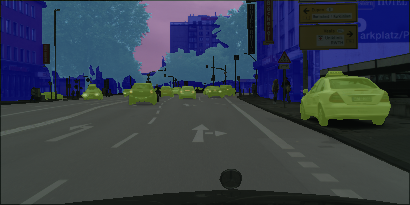

In [3]:
# Check dataset
X_viz, X_viz_norm = dt_train.get_image_visualization(5)
gt_mask = dt_train.get_ground_truth(5)
gt_mask = gt_mask.argmax(dim=0)

bool_masks = gt_mask == torch.arange(n_classes)[:, None, None]

sm = draw_segmentation_masks(X_viz, masks=bool_masks, alpha=0.6, colors = list(((0,0,0),( 70, 70, 70),(128,64,128),(107,142, 35),(70,130,180),(0,0,142))))
to_pil_image(sm)

## Model

### FCN

In [4]:
##MODEL Pretrained with RESNET 50
#Initialize model with the best available weights
FCN_weights = FCN_ResNet50_Weights.DEFAULT
backbone_weights = ResNet50_Weights.DEFAULT
#model = fcn_resnet50(backbone_weights=backbone_weights).to(device)
model = fcn_resnet50().to(device)

model.backbone.requires_grad_(True)
model.classifier[4] = nn.Conv2d(512, n_classes, kernel_size=(1, 1), stride=(1, 1))
model.classifier.requires_grad_(True)

cel = CrossEntropyLoss()
ad = Adam(model.parameters(), lr=1e-5, weight_decay = 1e-3)

fcn1 = modelFCN(model, loss_function=cel, optimizer = ad )
fcn1.model.to(device);

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

Completed epoch 1


Completed epoch 2


Completed epoch 3


Completed epoch 4


Completed epoch 5


Completed epoch 6


Completed epoch 7


Completed epoch 8


Completed epoch 9


Completed epoch 10


Completed epoch 11


Completed epoch 12


Completed epoch 13


Completed epoch 14


Completed epoch 15


Completed epoch 16


Completed epoch 17


Completed epoch 18


Completed epoch 19


Completed epoch 20


Completed epoch 21


Completed epoch 22


Completed epoch 23


Completed epoch 24


Completed epoch 25


Completed epoch 26


Completed epoch 27


Completed epoch 28


Completed epoch 29


Completed epoch 30


Completed epoch 31


Completed epoch 32


Completed epoch 33


Completed epoch 34


Completed epoch 35


Completed epoch 36


Completed epoch 37


Completed epoch 38


Completed epoch 39


Completed epoch 40


Completed epoch 41


Completed epoch 42


Completed epoch 43


Completed epoch 44


Completed epoch 45


Completed epoch 46


Completed epoch 47


Completed epoch 48


Completed epoch 49


Completed epoch 50


AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

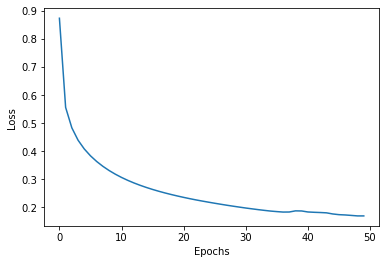

In [5]:
L = fcn1.train_model(trainloader, total_epochs=50, save_every_epochs = 10, ckp_name="fcn_28_02_6classes")

fig, ax = plt.subplots()
ax.plot(L)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");
plt.save_fig("Loss_50epochs")

### U-Net

##MODEL
model = UNet(enc_chs=(3,64,128,256,512,1024), dec_chs=(1024, 512, 256, 128, 64), num_class=n_classes, retain_dim=True, out_sz=resize_dimensions)
#model = model.to(device)

cel = CrossEntropyLoss()
dl = DiceLoss()
ad = Adam(model.parameters(), lr=1e-5, weight_decay = 1e-3)

unet1 = modelUNet(model, loss_function=cel, optimizer = ad )
unet1.model.to(device);

t_start = time.time()

L = unet1.train_model(trainloader, total_epochs=10, save_every_epochs = 10, ckp_name="unet_10ep_25_02")

print("Training time: {} s".format(time.time()-t_start))

fig, ax = plt.subplots()
ax.plot(L)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");

## Model validation

In [ ]:
# Load checkpoint
fcn1.model.load_state_dict(torch.load("Checkpoints/fcn_27_02_20.pth"))
fcn1.model.eval();

In [ ]:
# Step 4: Use the model and visualize the prediction
fcn1.model.eval()
_, X_test, y_test = next(iter(valloader))
X_test, y_test = X_test.to(device), y_test.to(device) 

fcn1.model.to(device)
pred = fcn1.model(X_test)['out'] #METTILO PER FCN

# Apply softmax and threshold value
out = F.softmax(pred,dim=1)# > 0.5
#out = out.int()
out = torch.argmax(out, dim=1)

print("Output dimension: {}".format(out.size()))

In [ ]:
# Computing metrics
#print("Mean Pixelwise Accuracy: {}".format(round(meanPixelwiseAccuracy(out,y_test),2)))

print("Mean IoU: {}".format(round(meanIoU(out, y_test),3)))

## Visualisation

In [ ]:
n_test = 8

X_viz, X_viz_norm = dt_val.get_image_visualization(n_test)
gt_viz = dt_val.get_ground_truth(n_test)
gt_viz = gt_viz.argmax(dim=0)

# Process the input with the model
pred_viz = fcn1.model(X_viz_norm.unsqueeze(0).to(device))['out'] #METTILO PER FCN

#out_viz = torch.sigmoid(pred_viz) > 0.5
#out_viz = out_viz.int()[0] # unpack the batch with [0]

out_viz = F.softmax(pred_viz,dim=1)# > 0.5
out_viz = torch.argmax(out_viz, dim=1)

# Create the mask with argmax
mask = out_viz#.argmax(dim=0)

In [ ]:
# Single class visualisation
class_id = 3
single_class_mask = (mask == class_id)

sm = draw_segmentation_masks(X_viz, masks=single_class_mask, alpha=0.7, colors = ( 81,  0, 81))
to_pil_image(sm)

In [ ]:
from torchvision.utils import make_grid

# Multiple class visualisation
bool_masks = mask.cpu() == torch.arange(n_classes)[:, None, None]
gt_bool_masks = gt_viz.cpu() == torch.arange(n_classes)[:, None, None]

sm = draw_segmentation_masks(X_viz, masks=bool_masks, alpha=0.5,  colors = list(((0,0,0),(128,64,128),(70,130,180),(0,0,142))))
gt_sm = draw_segmentation_masks(X_viz, masks=gt_bool_masks, alpha=0.5, colors = list(((0,0,0),(128,64,128),(70,130,180),(0,0,142))))

#to_pil_image(sm)

dog_list = [sm, gt_sm]

grid = make_grid(dog_list)
to_pil_image(grid)

In [ ]:
sm_img = to_pil_image(sm)

## Check the model

from Utilities.torchsummaryNew import summary

device = torch.device('cuda')

x = torch.randn(1, 3, 224, 224).to(device)
fcn1.model.to(device);

summary(fcn1.model, (3, 128, 256))
#summary(mymodel, (3, 128, 256))

In [ ]:
#from visionNew.torchvision.models.segmentation import fcn_resnet50

#from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights

## Labels

In [ ]:
from Utilities.cityscapesLables import CityscapesLabels

labels = CityscapesLabels.get_labels()

labels

In [ ]:
from collections import namedtuple

Label = namedtuple( 'Label' , [
            'name'        , 
            'id'          , # An integer ID that is associated with this label. The IDs are used to represent the label in ground truth images
            'trainId'     , 
            'ignoreInEval', # Whether pixels having this class as ground truth label are ignored during evaluations or not
            'color'       , # The color of this label
            ] )

#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
            #       name                     id    trainId   ignoreInEval   color
            Label(  'unlabeled'            ,  0 ,      255 ,  True         , (  0,  0,  0) ),
            Label(  'ego vehicle'          ,  1 ,      255 ,  True         , (  0,  0,  0) ),
            Label(  'rectification border' ,  2 ,      255 ,  True         , (  0,  0,  0) ),
            Label(  'out of roi'           ,  3 ,      255 ,  True         , (  0,  0,  0) ),
            Label(  'static'               ,  4 ,      255 ,  True         , (  0,  0,  0) ),
            Label(  'dynamic'              ,  5 ,      255 ,  True         , (111, 74,  0) ),
            Label(  'ground'               ,  6 ,      255 ,  True         , ( 81,  0, 81) ),
            Label(  'road'                 ,  7 ,        0 ,  False        , (128, 64,128) ),
            Label(  'sidewalk'             ,  8 ,        1 ,  False        , (244, 35,232) ),
            Label(  'parking'              ,  9 ,      255 ,  True         , (250,170,160) ),
            Label(  'rail track'           , 10 ,      255 ,  True         , (230,150,140) ),
            Label(  'building'             , 11 ,        2 ,  False        , ( 70, 70, 70) ),
            Label(  'wall'                 , 12 ,        3 ,  False        , (102,102,156) ),
            Label(  'fence'                , 13 ,        4 ,  False        , (190,153,153) ),
            Label(  'guard rail'           , 14 ,      255 ,  True         , (180,165,180) ),
            Label(  'bridge'               , 15 ,      255 ,  True         , (150,100,100) ),
            Label(  'tunnel'               , 16 ,      255 ,  True         , (150,120, 90) ),
            Label(  'pole'                 , 17 ,        5 ,  False        , (153,153,153) ),
            Label(  'polegroup'            , 18 ,      255 ,  True         , (153,153,153) ),
            Label(  'traffic light'        , 19 ,        6 ,  False        , (250,170, 30) ),
            Label(  'traffic sign'         , 20 ,        7 ,  False        , (220,220,  0) ),
            Label(  'vegetation'           , 21 ,        8 ,  False        , (107,142, 35) ),
            Label(  'terrain'              , 22 ,        9 ,  False        , (152,251,152) ),
            Label(  'sky'                  , 23 ,       10 ,  False        , ( 70,130,180) ),
            Label(  'person'               , 24 ,       11 ,  False        , (220, 20, 60) ),
            Label(  'rider'                , 25 ,       12 ,  False        , (255,  0,  0) ),
            Label(  'car'                  , 26 ,       13 ,  False        , (  0,  0,142) ),
            Label(  'truck'                , 27 ,       14 ,  False        , (  0,  0, 70) ),
            Label(  'bus'                  , 28 ,       15 ,  False        , (  0, 60,100) ),
            Label(  'caravan'              , 29 ,      255 ,  True         , (  0,  0, 90) ),
            Label(  'trailer'              , 30 ,      255 ,  True         , (  0,  0,110) ),
            Label(  'train'                , 31 ,       16 ,  False        , (  0, 80,100) ),
            Label(  'motorcycle'           , 32 ,       17 ,  False        , (  0,  0,230) ),
            Label(  'bicycle'              , 33 ,       18 ,  False        , (119, 11, 32) ),
            Label(  'license plate'        , -1 ,       -1 ,  True         , (  0,  0,142) ),
        ]

#--------------------------------------------------------------------------------
# Create dictionaries for a fast lookup
#--------------------------------------------------------------------------------

# name to label object
name2label      = { label.name    : label for label in labels           }
# id to label object
id2label        = { label.id      : label for label in labels           }
# trainId to label object
trainId2label   = { label.trainId : label for label in reversed(labels) }


In [ ]:
trainId = {
    0: 0,  # unlabeled
    1: 0,  # ego vehicle
    2: 0,  # rect border
    3: 0,  # out of roi
    4: 0,  # static
    5: 0,  # dynamic
    6: 0,  # ground
    7: 1,  # road
    8: 0,  # sidewalk
    9: 0,  # parking
    10: 0,  # rail track
    11: 0,  # building
    12: 0,  # wall
    13: 0,  # fence
    14: 0,  # guard rail
    15: 0,  # bridge
    16: 0,  # tunnel
    17: 0,  # pole
    18: 0,  # polegroup
    19: 0,  # traffic light
    20: 0,  # traffic sign
    21: 0,  # vegetation
    22: 0,  # terrain
    23: 2,  # sky
    24: 0,  # person
    25: 0,  # rider
    26: 3,  # car
    27: 0,  # truck
    28: 0,  # bus
    29: 0,  # caravan
    30: 0,  # trailer
    31: 0,  # train
    32: 0,  # motorcycle
    33: 0,  # bicycle
    -1: 0  # licenseplate
}

In [ ]:
mapping.get(33)

In [ ]:
torch.tensor([1,2]) + torch.tensor([0,1])

In [ ]:
trainId = {
    0: 0,  # unlabeled
    1: 0,  # ego vehicle
    2: 0,  # rect border
    3: 1,  # out of roi
    4: 1,  # static
}

In [ ]:
img = torch.tensor([[0,1,2,4,0,1],[3,4,0,1,2,4]])

In [ ]:
mask = torch.zeros_like(img).repeat(2, 1, 1)

In [ ]:
img = img.resize(-1)

In [ ]:
for k in trainId:
    trainClass = trainId.get(k)
    mask[trainClass,:] += ((img == k)*1)

In [ ]:
mask

In [ ]:
mask[0]+mask[1]